In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_params = {
    "xtick.direction": "in",
    "ytick.direction": "in",
    "lines.markeredgecolor": "k",
    "lines.markeredgewidth": 1.25,
    "figure.dpi": 200,
    "text.usetex": True,
    "font.family": "serif"}
sns.set_theme(context = "talk", style="ticks", rc=custom_params)

Analyzing convergence for: 10000000_0.001_1.0_2.2_10.0_0.0011_1.0_1.0_10_10


/var/folders/cn/hc6sy9vj2vlchg2np1k_bvvh0000gn/T/ipykernel_3149/2927350894.py:15: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return P / np.trapz(P, q1)
/var/folders/cn/hc6sy9vj2vlchg2np1k_bvvh0000gn/T/ipykernel_3149/2927350894.py:42: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  simulated = simulated / np.trapz(simulated, q1_bins_center)


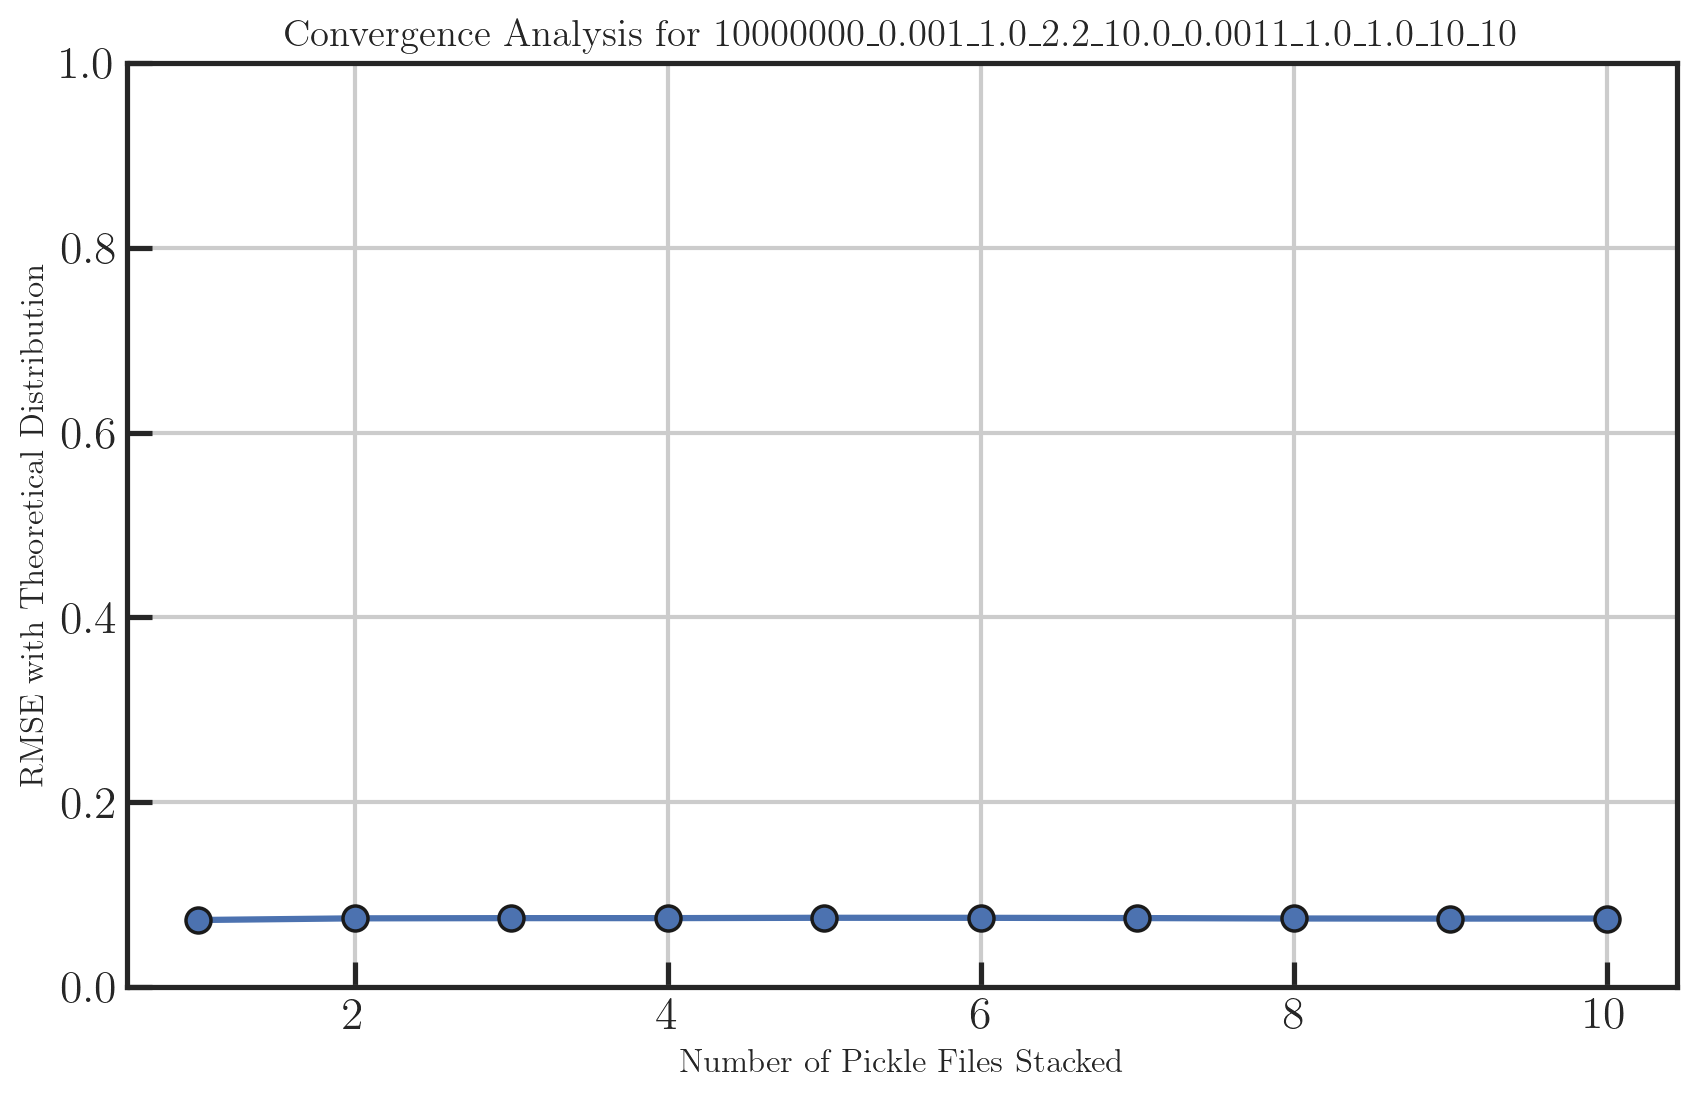

Convergence analysis completed.
Analyzing convergence for: 10000000_0.001_1.0_2.2_10.0_0.0014_1.0_1.0_10_10


/var/folders/cn/hc6sy9vj2vlchg2np1k_bvvh0000gn/T/ipykernel_3149/2927350894.py:15: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return P / np.trapz(P, q1)
/var/folders/cn/hc6sy9vj2vlchg2np1k_bvvh0000gn/T/ipykernel_3149/2927350894.py:42: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  simulated = simulated / np.trapz(simulated, q1_bins_center)


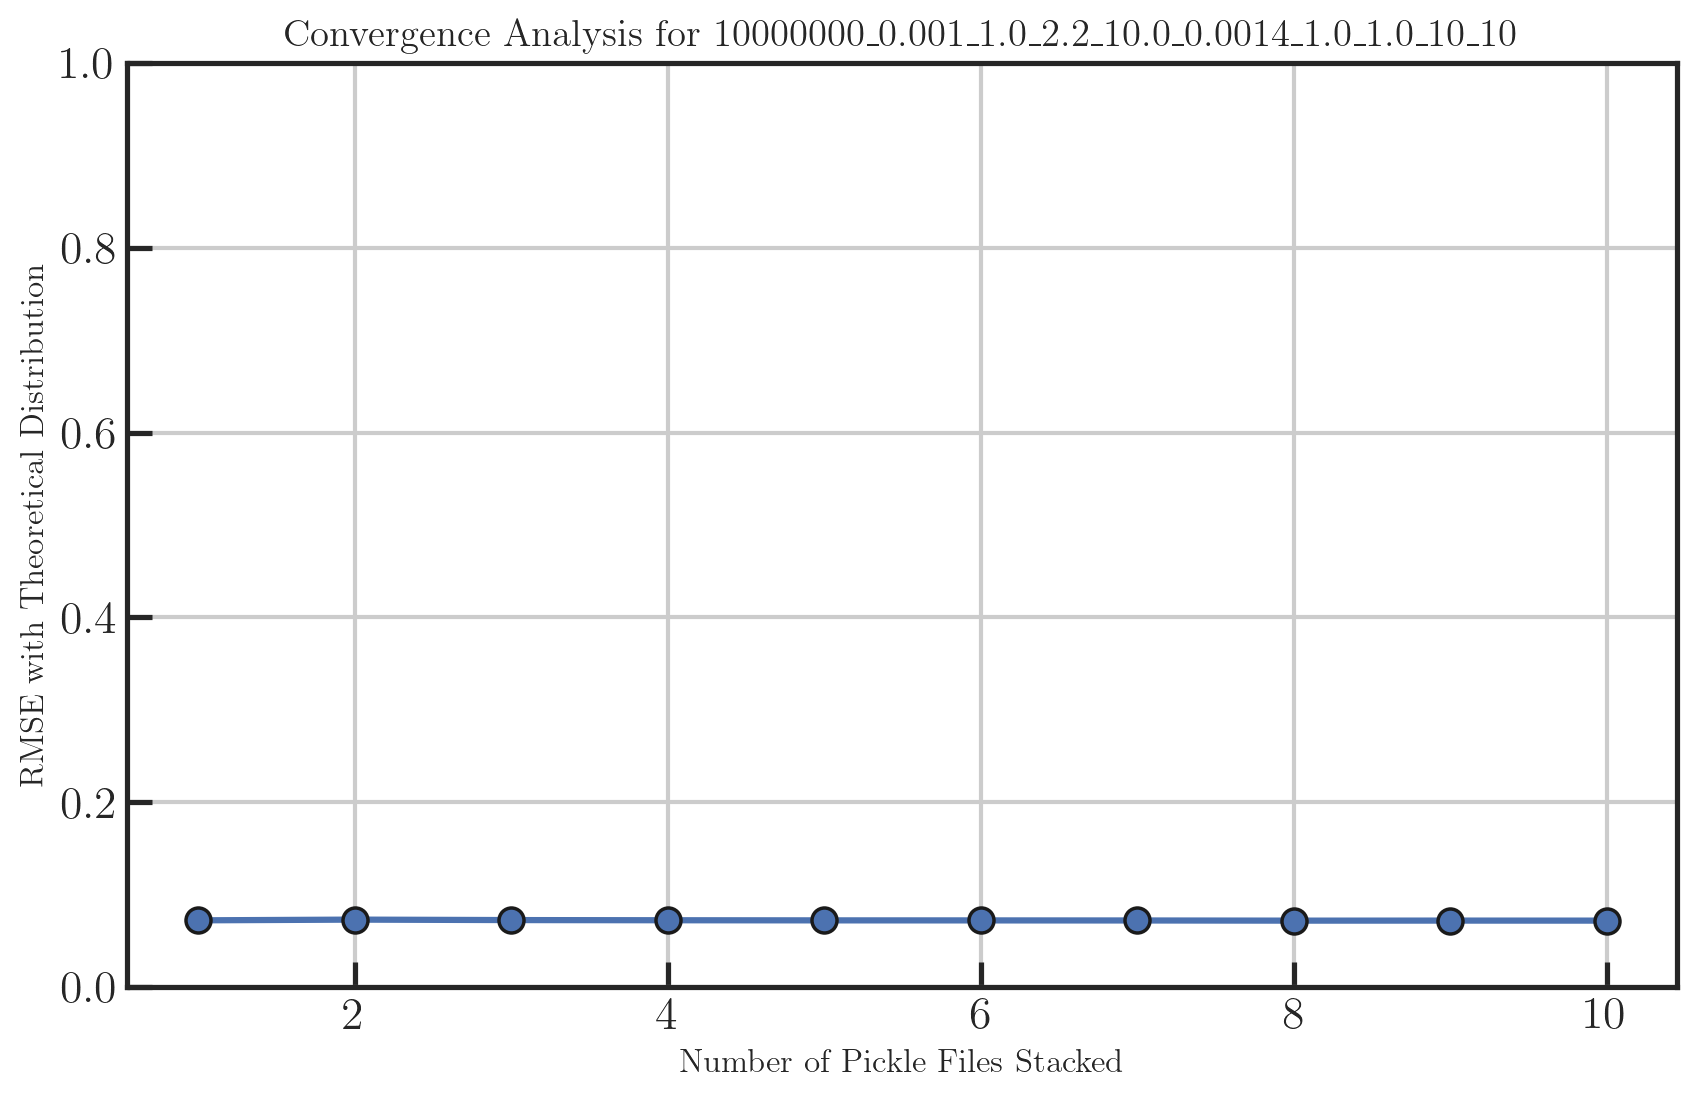

Convergence analysis completed.
Analyzing convergence for: 10000000_0.001_1.0_2.2_10.0_0.001_1.0_1.0_10_10


/var/folders/cn/hc6sy9vj2vlchg2np1k_bvvh0000gn/T/ipykernel_3149/2927350894.py:15: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return P / np.trapz(P, q1)
/var/folders/cn/hc6sy9vj2vlchg2np1k_bvvh0000gn/T/ipykernel_3149/2927350894.py:42: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  simulated = simulated / np.trapz(simulated, q1_bins_center)


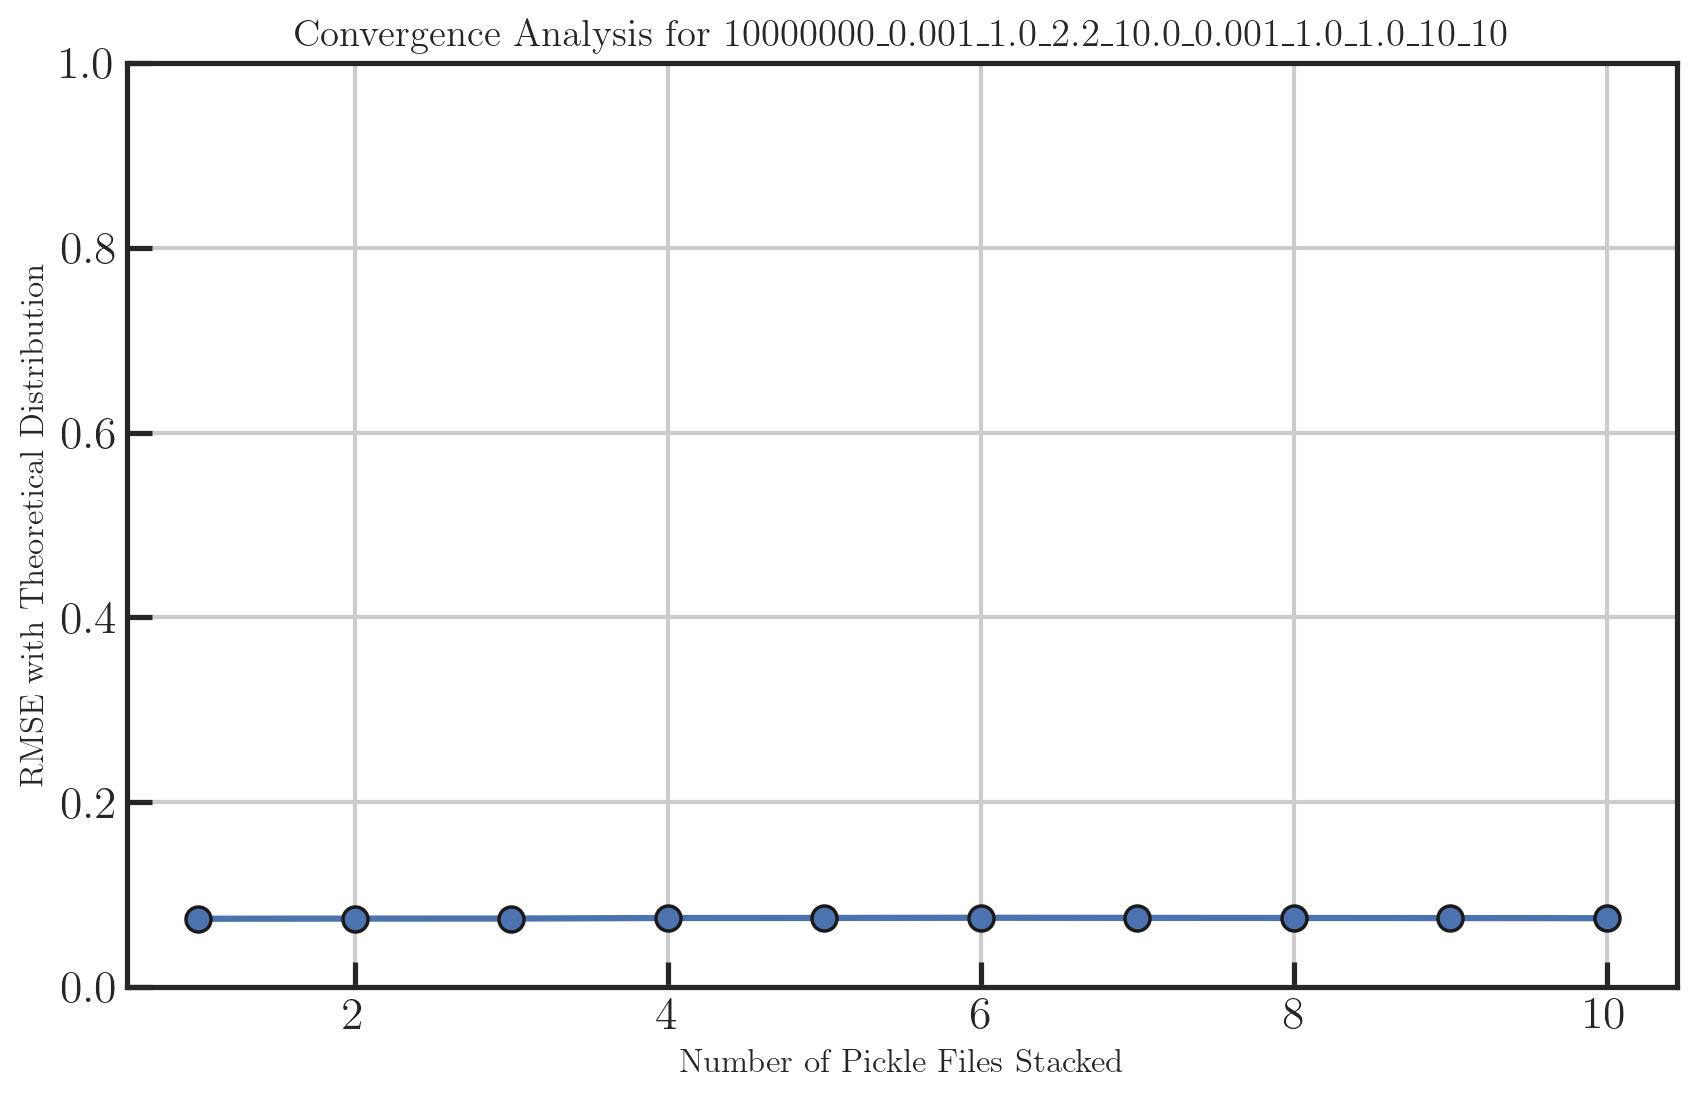

Convergence analysis completed.
Analyzing convergence for: 10000000_0.001_1.0_2.2_10.0_0.002_1.0_1.0_10_10


/var/folders/cn/hc6sy9vj2vlchg2np1k_bvvh0000gn/T/ipykernel_3149/2927350894.py:15: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return P / np.trapz(P, q1)
/var/folders/cn/hc6sy9vj2vlchg2np1k_bvvh0000gn/T/ipykernel_3149/2927350894.py:42: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  simulated = simulated / np.trapz(simulated, q1_bins_center)


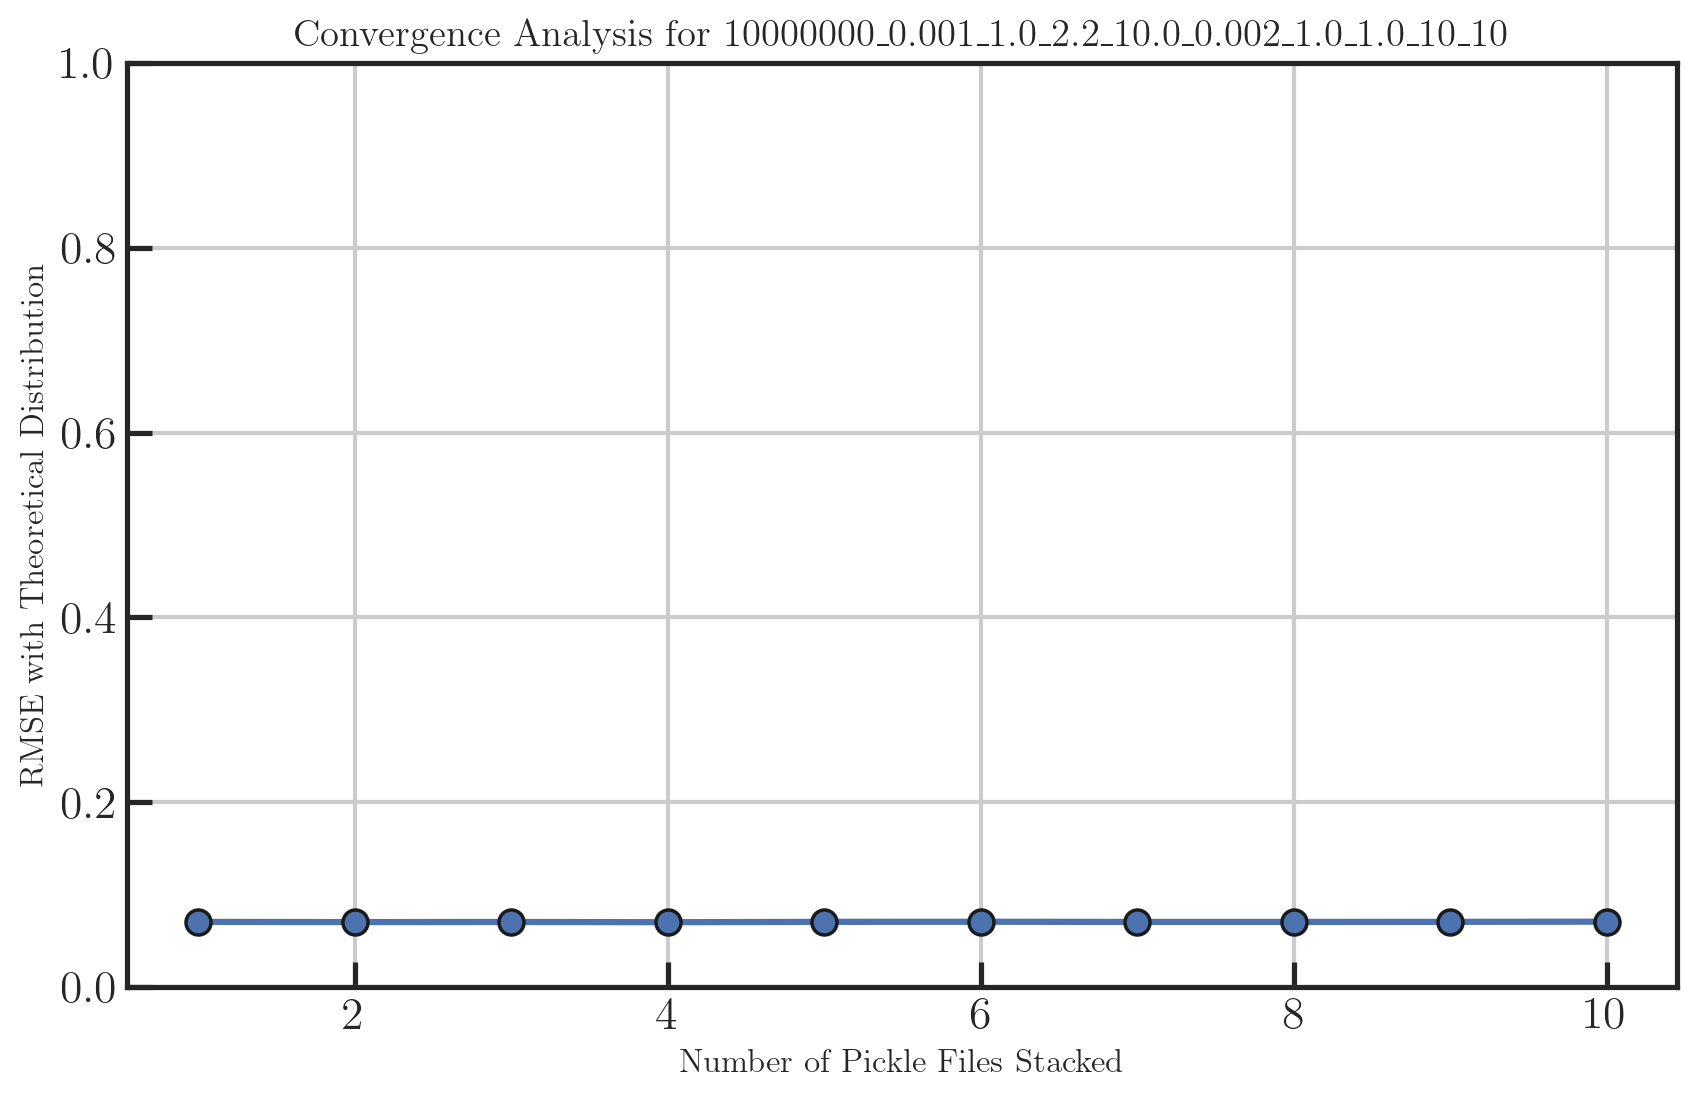

Convergence analysis completed.


In [6]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Define the theoretical distribution functions
def phi_1(q, alpha_1, l_1):
    return alpha_1 * np.sin(2 * np.pi * q / l_1)

def _Peq_projection1D_q1(q1, beta, alpha_1, l_1):
    return np.exp(-beta * phi_1(q1, alpha_1, l_1))

def Peq_projection1D_q1(q1, beta, alpha_1, l_1):  # Normalized equilibrium distribution
    P = np.array([_Peq_projection1D_q1(q1i, beta, alpha_1, l_1) for q1i in q1])
    return P / np.trapz(P, q1)

# Function to load pickle files and extract mean_q1_histo
def load_pickle_files(directory):
    mean_q1_histo = []
    q1_bins_center = None
    
    for filename in sorted(os.listdir(directory)):
        if filename.endswith('.pickle'):
            with open(os.path.join(directory, filename), 'rb') as f:
                data = pickle.load(f)
                mean_q1_histo.append(data["mean_q1_histo"])
                q1_bins_center = data["q1_bins_center"]  

    return np.array(mean_q1_histo), q1_bins_center


# Function to compute the cumulative average of mean_q1_histo
def compute_cumulative_average(mean_q1_histo):
    cumulative_average = np.cumsum(mean_q1_histo, axis=0) / (np.arange(1, mean_q1_histo.shape[0] + 1)[:, None])
    return cumulative_average

# Function to compute RMSE between simulated and theoretical distributions
def compute_rmse(simulated, theoretical):
    return np.sqrt(np.mean((simulated - theoretical) ** 2))

def compute_mape(simulated, theoritical, q1_bins_center):
    simulated = simulated / np.trapz(simulated, q1_bins_center)
    return np.mean(np.abs((simulated - theoritical) / theoritical))

# Function to extract parameters from the subfolder name
def extract_parameters_from_folder(folder_name):
    parts = folder_name.split('_')
    N = int(parts[0])
    tau = float(parts[1])
    g11 = float(parts[2])
    g12 = float(parts[3])
    g22 = float(parts[4])
    kappa = float(parts[5])
    alpha = float(parts[6])
    l = float(parts[7])
    n_tasks = int(parts[8])
    trajectories_per_task = int(parts[9])
    return N, tau, g11, g12, g22, kappa, alpha, l, n_tasks, trajectories_per_task

# Main function to analyze convergence for a given subfolder
def analyze_convergence(directory, beta):
    # Extract parameters from the subfolder name
    folder_name = os.path.basename(directory)
    _, _, _, _, _, _, alpha, l, n_tasks, _ = extract_parameters_from_folder(folder_name)

    # Load simulated data from pickle files
    mean_q1_histo, q1_bins_center = load_pickle_files(directory)
    
    # Calculate the theoretical distribution Peq_q1
    Peq_q1 = Peq_projection1D_q1(q1_bins_center, beta, alpha, l)

    # Compute cumulative averages of the simulated data
    cumulative_averages = compute_cumulative_average(mean_q1_histo)

    # Compute RMSE for each cumulative average compared to the theoretical distribution
    rmse_values = [compute_mape(cumulative_avg, Peq_q1, q1_bins_center) for cumulative_avg in cumulative_averages]

    # Plot the RMSE convergence curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(rmse_values) + 1), rmse_values, marker='o')
    plt.ylim(0,1)
    plt.xlabel('Number of Pickle Files Stacked', fontsize=12)
    plt.ylabel('RMSE with Theoretical Distribution', fontsize=12)
    plt.title(f'Convergence Analysis for {folder_name}', fontsize=14)
    plt.grid(True)
    plt.show()

    print("Convergence analysis completed.")

beta = 1.0 

# Directory containing subfolders of pickle files
base_directory = 'output_files'

# Loop over each subfolder and analyze convergence
for subfolder in sorted(os.listdir(base_directory)):
    subfolder_path = os.path.join(base_directory, subfolder)
    if os.path.isdir(subfolder_path):
        print(f"Analyzing convergence for: {subfolder}")
        analyze_convergence(subfolder_path, beta)


# Remarks

Needs alpha higher
Minimal contribution of kappa
Better results for longer simulations